**Khai báo thư viện** *

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from scipy.stats import anderson
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay,recall_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
data = pd.read_csv('/content/sample_data/credit_card_churn.csv')#tải dữ liệu

In [3]:
data.shape#Hiển thị số cột, dòng của dataset

(10127, 23)

**Phân tích dữ liệu**



In [4]:
data.head()#xuất 5 dòng đầu của dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
#Loại bỏ các cột không cần thiết khỏi bộ dữ liệu
df = data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [6]:
df.columns
#Lấy danh sách các tên cột trong bộ dữ liệu

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
df.isnull().sum()
#Đếm số lượng giá trị thiếu trong từng cột của DataFrame

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.describe()
#Tóm tắt thống kê của các cột số trong Dataframe

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
df.info()
#Hiển thị thông tin tổng quát về DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
#trích xuất và lưu trữ các cột dữ liệu số
df_numeric= df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
'Avg_Utilization_Ratio']]

In [11]:
def plot_boxplot(df, color='skyblue', kde=False):
    num_columns = len(df.columns)# Số lượng cột dữ liệu trong DataFrame
    num_rows = (num_columns + 1) // 2 # Số lượng dòng cho subplot (chỉnh cho hiển thị hợp lý)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows)) #Tạo subplot với kích thước và số lượng dòng phù hợp
    axes = axes.flatten() # Chuyển từ ma trận 2D thành 1D


    for i, column_name in enumerate(df.columns):# Vòng lặp qua từng cột dữ liệu
        sns.boxplot(x=df[column_name], color=color, ax=axes[i]) # Vẽ boxplot của cột dữ liệu hiện tại
        axes[i].set_xlabel(column_name) # Đặt nhãn cho trục x là tên cột dữ liệu
        axes[i].set_ylabel('Value') # Đặt nhãn cho trục y là 'Value'
        axes[i].set_title(f'Box plot of {column_name}') # Đặt tiêu đề cho boxplot
        # Nếu kde=True, vẽ cả KDE plot trên boxplot
        if kde:
            sns.kdeplot(df[column_name], color=color, ax=axes[i], linewidth=3)

    # Loại bỏ các subplot không sử dụng (nếu có)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    # Hiển thị subplot
    plt.tight_layout()
    plt.show()

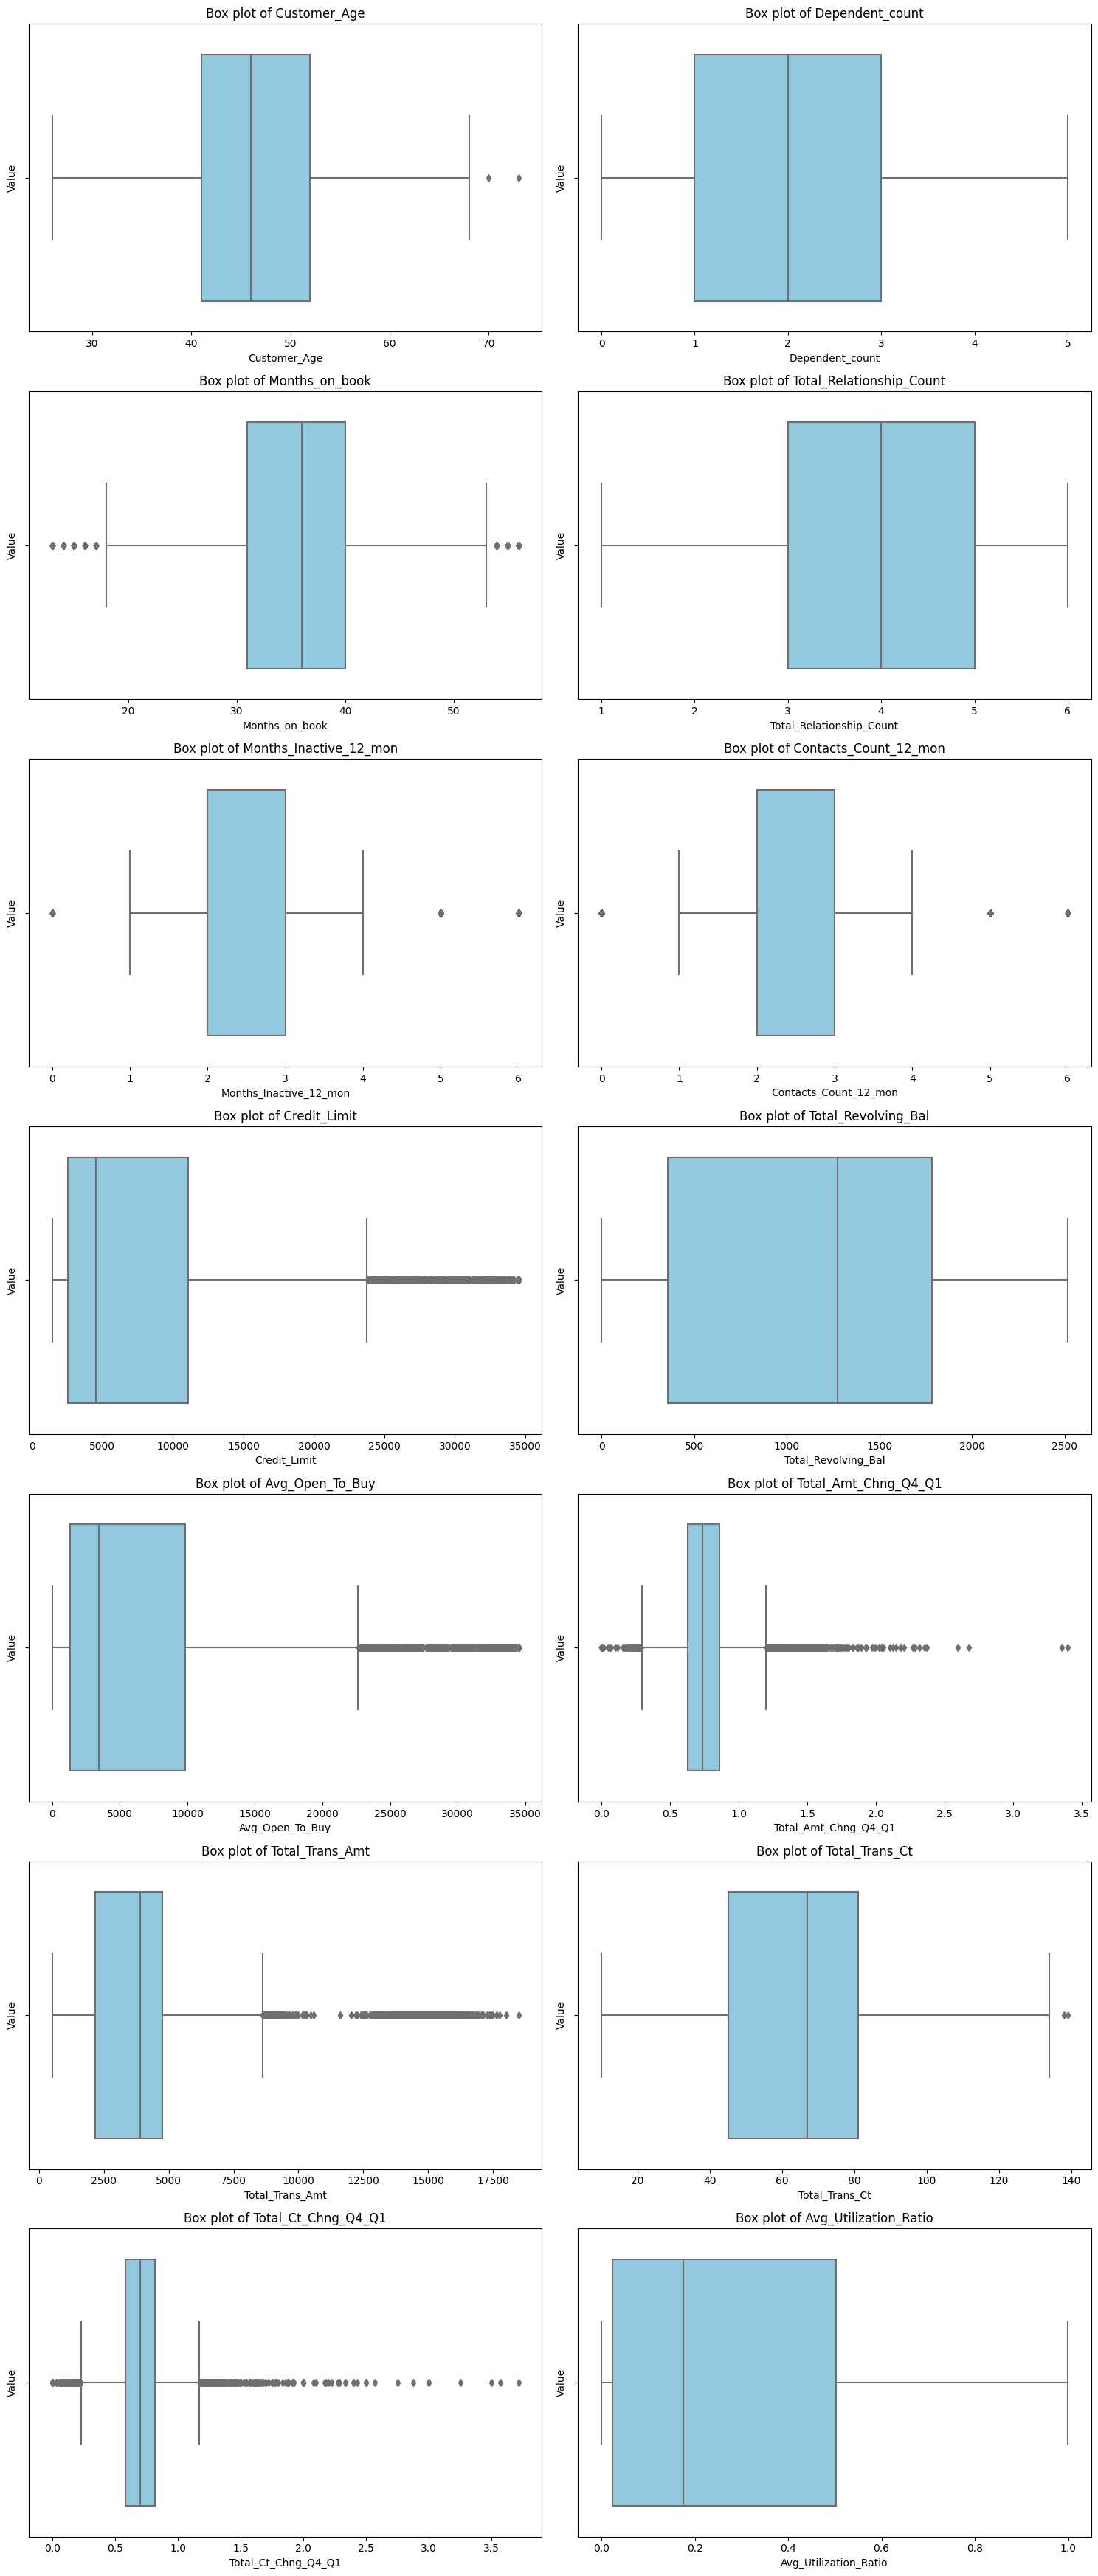

In [12]:
plot_boxplot(df_numeric)
#Vẽ biểu đồ boxplot cho các dữ liệu số trong dataframe df_numeric

In [13]:
def plot_histogram(df, color='skyblue', kde=False):
    # Tính số cột và số hàng cần để vẽ biểu đồ
    num_columns = len(df.columns)
    num_rows = (num_columns + 1) // 2

    # Tạo figure và axes cho biểu đồ
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    # Lặp qua từng cột trong dataframe để vẽ histogram
    for i, column_name in enumerate(df.columns):
        # Vẽ histogram cho cột hiện tại
        sns.histplot(x=df[column_name], color=color, ax=axes[i])
        axes[i].set_xlabel(column_name)  # Đặt tên cho trục x
        axes[i].set_ylabel('Value')      # Đặt tên cho trục y
        axes[i].set_title(f'Box plot of {column_name}')  # Đặt tiêu đề cho biểu đồ

        # Nếu được yêu cầu, vẽ KDE (Kernel Density Estimate) plot
        if kde:
            sns.kdeplot(df[column_name], color=color, ax=axes[i], linewidth=3)

    # Xóa các subplot không sử dụng (nếu có)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Định dạng layout và hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

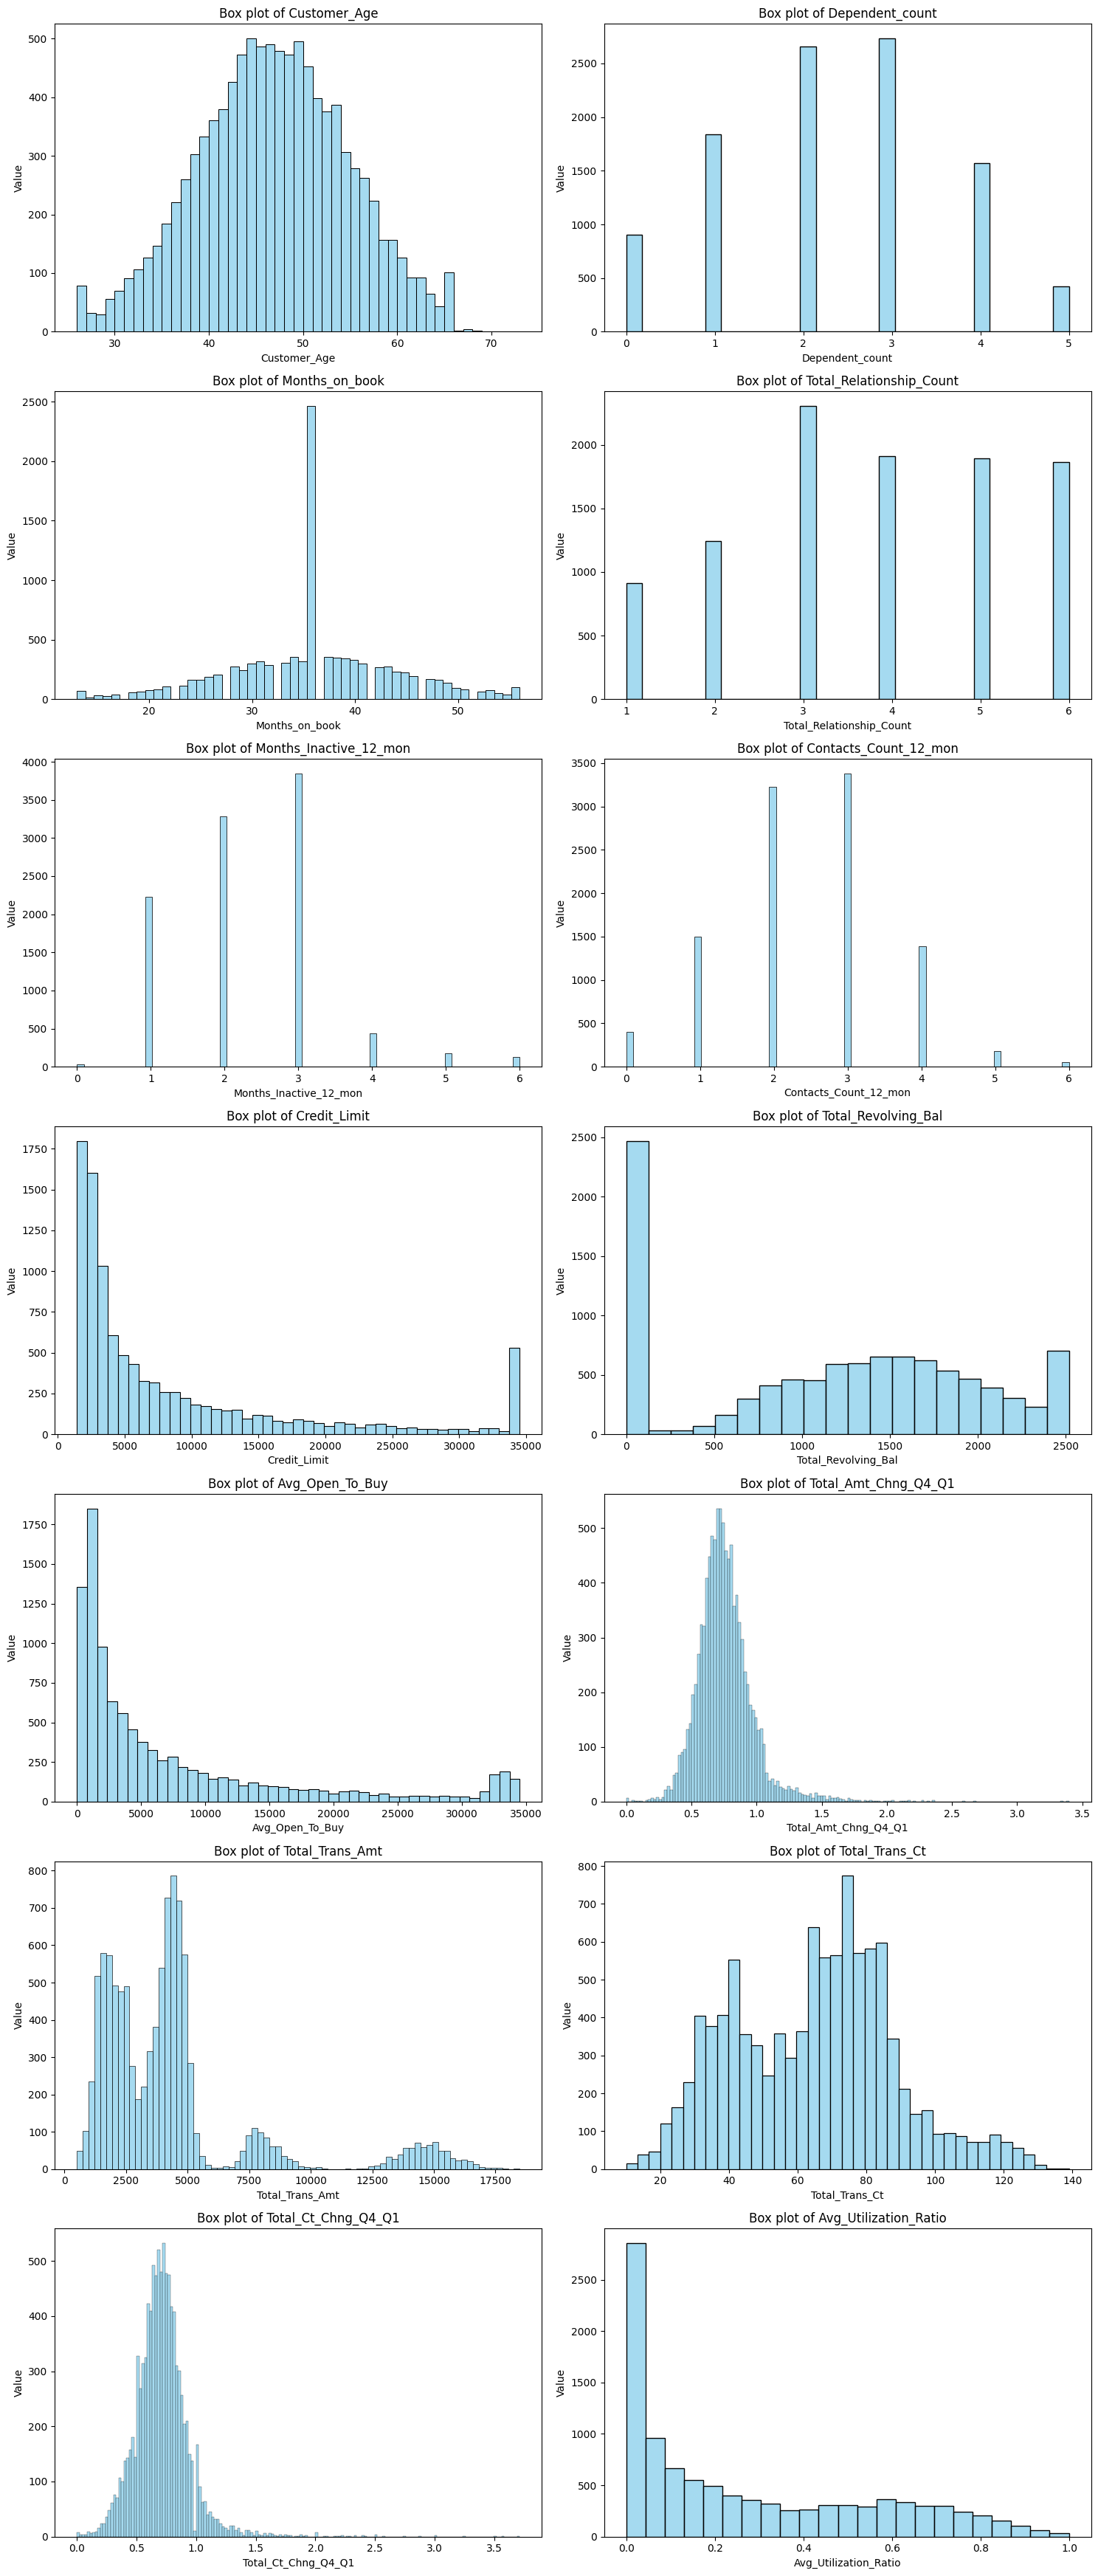

In [14]:
plot_histogram(df_numeric)
#vẽ biểu đồ phân bố tần suất (histogram) cho các cột dữ liệu số trong DataFrame

In [15]:
df['Attrition_Flag'].unique()
# Trả về một mảng chứa các giá trị duy nhất trong cột 'Attrition_Flag'.

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [16]:
df['Attrition_Flag'].value_counts()
# Đếm số lượng các giá trị duy nhất trong cột 'Attrition_Flag' của DataFrame và hiển thị số lần xuất hiện của mỗi giá trị.

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

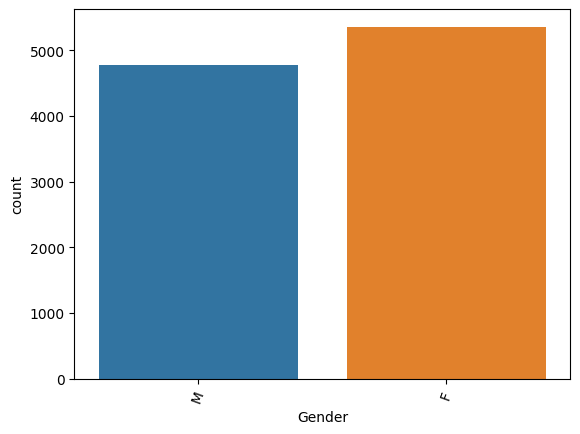

In [17]:
# Tạo biểu đồ countplot để đếm số lượng các giá trị trong cột 'Gender' của DataFrame df.
sns.countplot(x='Gender', data=df)
plt.xticks(rotation=70) # Xoay nhãn trục x để hiển thị dễ đọc hơn.
plt.show() # Hiển thị biểu đồ đã tạo.

<Axes: xlabel='Attrition_Flag', ylabel='count'>

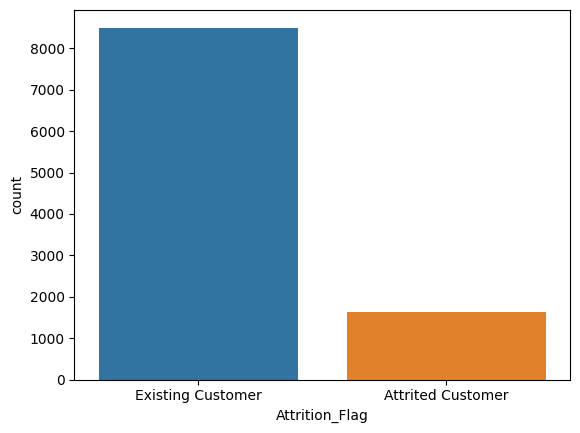

In [18]:
sns.countplot(x='Attrition_Flag', data=df)
#Tạo biểu đồ countplot để đếm số lượng các giá trị trong cột 'Attrition_Flag' của DataFrame df.

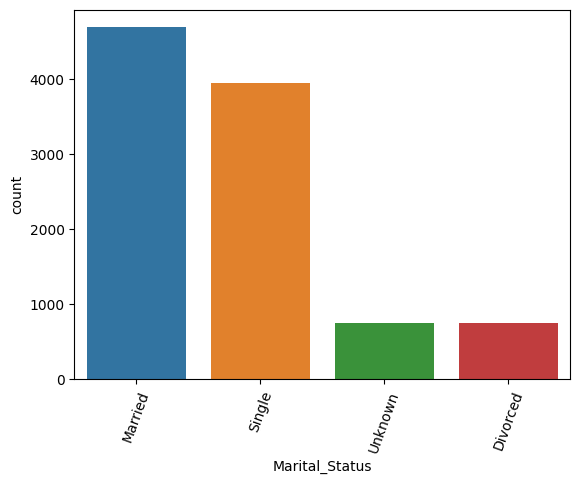

In [19]:
sns.countplot(x='Marital_Status', data=df) # Tạo biểu đồ countplot để đếm số lượng các giá trị trong cột 'Marital_Status' của DataFrame df.
plt.xticks(rotation=70)
plt.show()

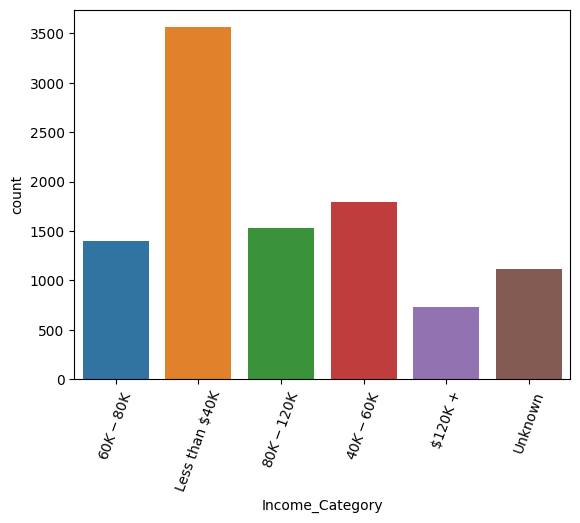

In [20]:
sns.countplot(x='Income_Category', data=df)# Tạo biểu đồ countplot để đếm số lượng các giá trị trong cột 'Income_Category' của DataFrame df.
plt.xticks(rotation=70)
plt.show()

<Axes: >

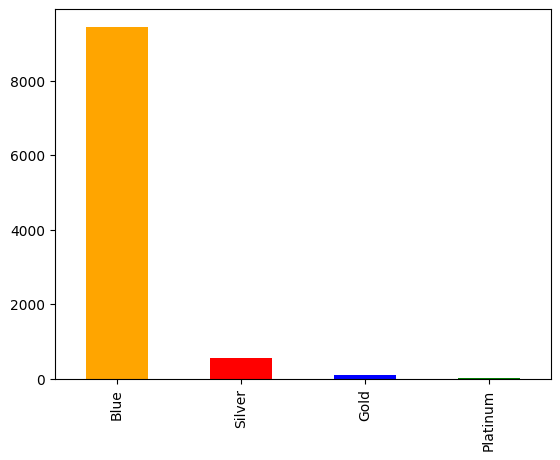

In [21]:
df['Card_Category'].value_counts().plot.bar(color=['orange','red','blue','green'])
# Đếm số lượng các giá trị duy nhất trong cột 'Card_Category' của DataFrame df và vẽ biểu đồ cột.
# Màu sắc của các cột được chỉ định là ['orange', 'red', 'blue', 'green'] theo thứ tự các giá trị duy nhất.

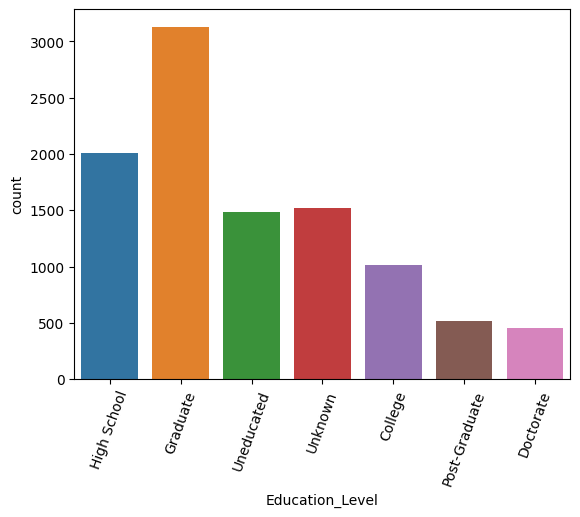

In [22]:
sns.countplot(x='Education_Level', data=df)
# Tạo biểu đồ countplot để đếm số lượng các giá trị trong cột 'Education_Level' của DataFrame df.
plt.xticks(rotation=70)
plt.show()

In [23]:
# Tạo một từ điển ánh xạ giữa 'Existing Customer' và 'Attrited Customer' sang 1 và 0 tương ứng.
target = {'Existing Customer': 1, 'Attrited Customer': 0}

# Sử dụng phương thức map để thay thế các giá trị trong cột 'Attrition_Flag' theo ánh xạ đã xác định trong từ điển target.
df['Attrition_Flag'] = df['Attrition_Flag'].map(target)

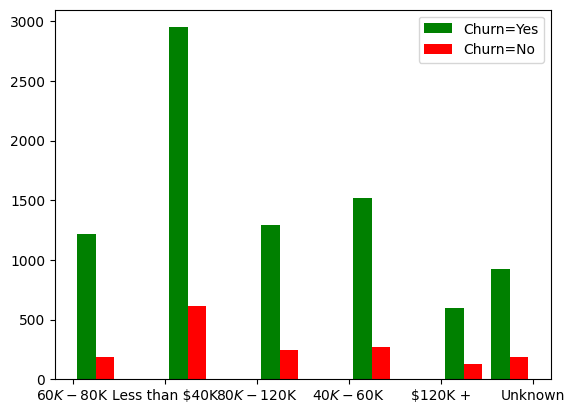

In [24]:
# Tạo tập dữ liệu 'atttrition_more_income' chứa 'Income_Category' của những dòng có 'Attrition_Flag' bằng 1 (Churn=Yes).
atttrition_more_income = df[df.Attrition_Flag == 1].Income_Category

# Tạo tập dữ liệu 'atttrition_less_income' chứa 'Income_Category' của những dòng có 'Attrition_Flag' bằng 0 (Churn=No).
atttrition_less_income = df[df.Attrition_Flag == 0].Income_Category

# Vẽ histogram cho hai tập dữ liệu trên cùng một biểu đồ, với màu sắc khác nhau và nhãn tương ứng.
plt.hist([atttrition_more_income, atttrition_less_income], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])

# Thêm chú thích (legend) để biểu thị ý nghĩa của màu sắc tương ứng.
plt.legend()

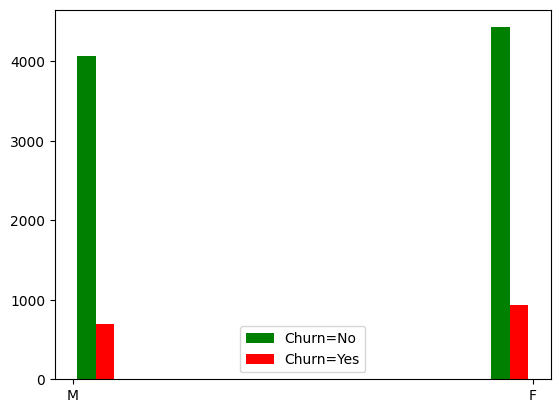

In [25]:
not_churn_Gender = df[df.Attrition_Flag==1].Gender
churn_Gender = df[df.Attrition_Flag==0].Gender
plt.hist([not_churn_Gender,churn_Gender],color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

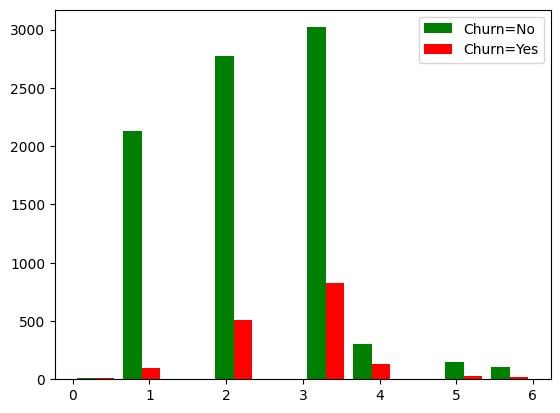

In [26]:
not_churn_total_inactive = df[df.Attrition_Flag==1].Months_Inactive_12_mon
churn_total_inactive = df[df.Attrition_Flag==0].Months_Inactive_12_mon
plt.hist([not_churn_total_inactive,churn_total_inactive],color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

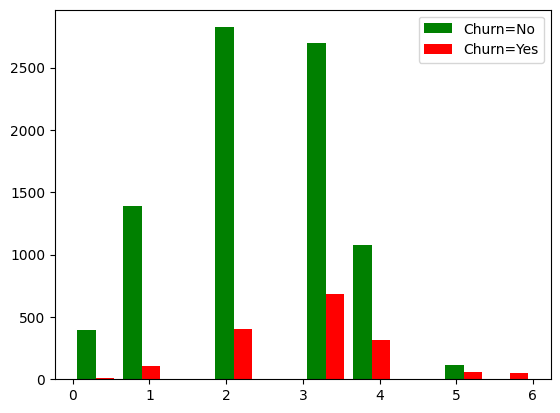

In [27]:
not_churn_contact_count = df[df.Attrition_Flag==1].Contacts_Count_12_mon
churn_contact_count = df[df.Attrition_Flag==0].Contacts_Count_12_mon
plt.hist([not_churn_contact_count,churn_contact_count],color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

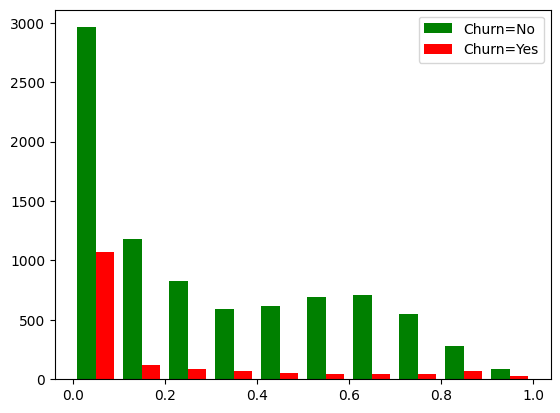

In [28]:
not_churn_contact_count = df[df.Attrition_Flag==1].Avg_Utilization_Ratio
churn_contact_count = df[df.Attrition_Flag==0].Avg_Utilization_Ratio
plt.hist([not_churn_contact_count,churn_contact_count],color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

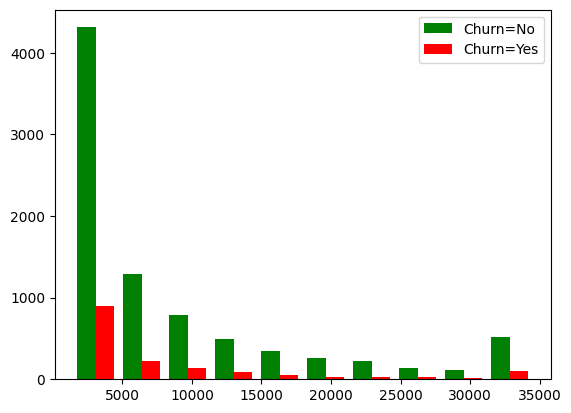

In [29]:
not_churn_credit_limit = df[df.Attrition_Flag==1].Credit_Limit
churn_credit_limit = df[df.Attrition_Flag==0].Credit_Limit
plt.hist([not_churn_credit_limit,churn_credit_limit],color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

In [30]:
sns.pairplot(df, diag_kind='kde')
#Tạo pairplot từ DataFrame df với các biến số được hiển thị trên đường chéo dưới dạng kernel density estimation (kde).

Output hidden; open in https://colab.research.google.com to view.

In [31]:
# Tạo một từ điển ánh xạ giới tính từ chuỗi sang biy
gender = {'M': 0, 'F': 1}

# Ánh xạ giá trị trong cột 'Gender' của DataFrame thành số nguyên sử dụng từ điển đã định nghĩa
df['Gender'] = df['Gender'].map(gender)

**Feature Importance**

<ipython-input-32-d024c9d94b8e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
<ipython-input-32-d024c9d94b8e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, square=True, \


(16.5, -0.5)

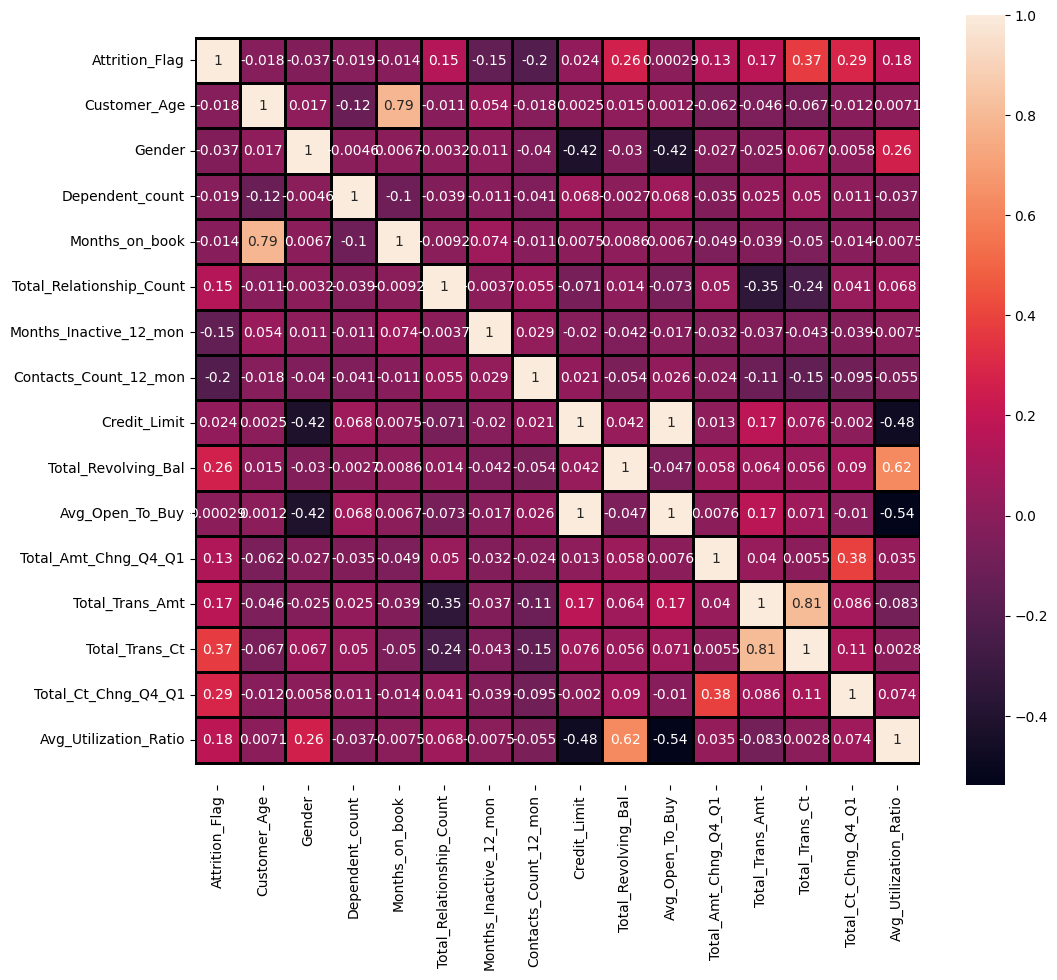

In [32]:
# Tạo ma trận tương quan và chỉ giữ các giá trị trên đường chéo chính (upper triangular)
matrix = np.triu(df.corr())

# Tạo một subplot với kích thước 12x10
f, ax = plt.subplots(figsize=(12, 10))

# Vẽ heatmap của ma trận tương quan với các tham số được cấu hình
ax = sns.heatmap(df.corr(), annot=True, square=True, \
                 linewidths=1, linecolor='black')

# Điều chỉnh giới hạn trục y để hiển thị đầy đủ nội dung của heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [33]:
# Danh sách các cột phân loại cần được mã hóa
cat_col = ['Income_Category', 'Education_Level', 'Marital_Status', 'Card_Category']

# Tạo một trình mã hóa one-hot (OneHotEncoder) không sử dụng ma trận sparse
encoder = OneHotEncoder(sparse=False)

# Mã hóa các cột phân loại và lưu trữ kết quả vào một mảng numpy
encoded_cols = encoder.fit_transform(df[cat_col])

# Tạo DataFrame mới từ các cột đã mã hóa với tên cột được xác định từ trình mã hóa
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_col))

# Kết hợp DataFrame gốc và DataFrame chứa các cột đã mã hóa
new_df = pd.concat([df.drop(cat_col, axis=1), encoded_cols_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
new_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,0,3,39,5,1,3,12691.0,777,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,49,1,5,44,6,1,2,8256.0,864,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,51,0,3,36,4,1,0,3418.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,40,1,4,34,3,4,1,3313.0,2517,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1,40,0,3,21,5,1,0,4716.0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
# Loại bỏ các cột cụ thể từ DataFrame new_df
new_df.drop(['Income_Category_Unknown', 'Education_Level_Unknown', 'Marital_Status_Unknown', 'Card_Category_Silver'],
            axis=1, inplace=True)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

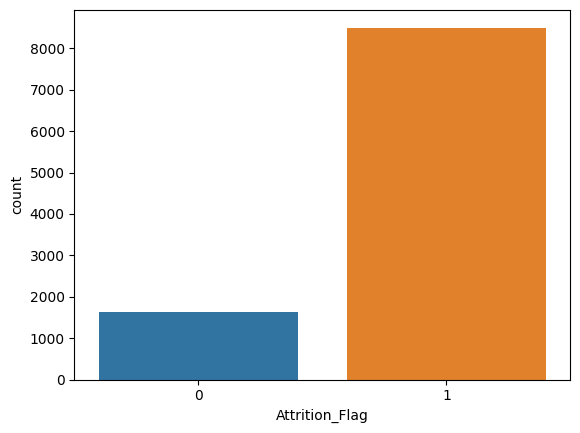

In [36]:
# Vẽ đồ thị cột cho biến 'Attrition_Flag'
sns.countplot(x='Attrition_Flag', data=new_df)

In [37]:
# Loại bỏ các cột cụ thể từ DataFrame new_df
new_df.drop(['Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Total_Trans_Amt'],
            axis=1, inplace=True)

In [38]:
# Lấy tất cả các cột trừ cột 'Attrition_Flag' để tạo DataFrame chứa các đặc trưng
x = new_df.drop(['Attrition_Flag'], axis=1)

# Lấy cột 'Attrition_Flag' để tạo Series chứa biến mục tiêu
y = new_df['Attrition_Flag']

In [39]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 29)
(2026, 29)
(8101,)
(2026,)


<Axes: xlabel='Attrition_Flag', ylabel='count'>

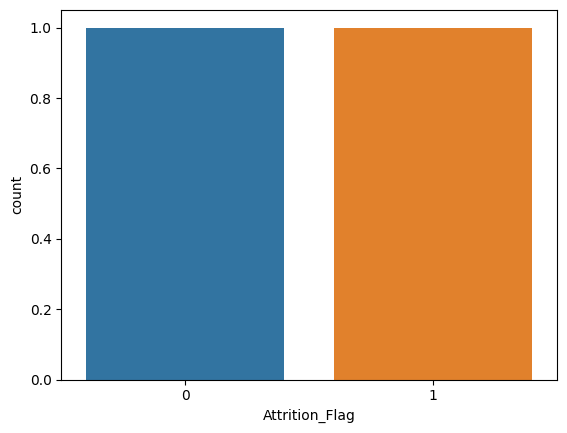

In [41]:
# Sử dụng SMOTE để tăng cường dữ liệu huấn luyện
smote = SMOTE()
x_train_over_sample, y_train_over_sample = smote.fit_resample(x_train, y_train)

# Đếm số lượng các lớp trước và sau khi áp dụng SMOTE
counter_before = Counter(y)
counter_after = Counter(y_train_over_sample)

# Tạo DataFrame để vẽ đồ thị so sánh số lượng các lớp trước và sau khi áp dụng SMOTE
df_after = pd.DataFrame(list(counter_after.items()), columns=["Attrition_Flag", 'Count'])

# Vẽ đồ thị cột của số lượng các lớp sau khi áp dụng SMOTE
sns.countplot(x='Attrition_Flag', data=df_after)

In [42]:
print(x_train_over_sample.shape)
print(x_test.shape)
print(y_train_over_sample.shape)
print(y_test.shape)

(13602, 29)
(2026, 29)
(13602,)
(2026,)


In [43]:
# Tạo DataFrame từ dữ liệu tăng cường (oversampled) và biến mục tiêu tương ứng
resampled_data = pd.concat([x_train_over_sample, y_train_over_sample], axis=1)

# Trộn ngẫu nhiên dữ liệu để tạo sự đa dạng trong việc huấn luyện
shuffled_resampled_data = resampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Tách đặc trưng và biến mục tiêu từ dữ liệu đã được trộn ngẫu nhiên
x_over_train_shuffled = shuffled_resampled_data.drop('Attrition_Flag', axis=1)
y_over_train_shuffled = shuffled_resampled_data['Attrition_Flag']

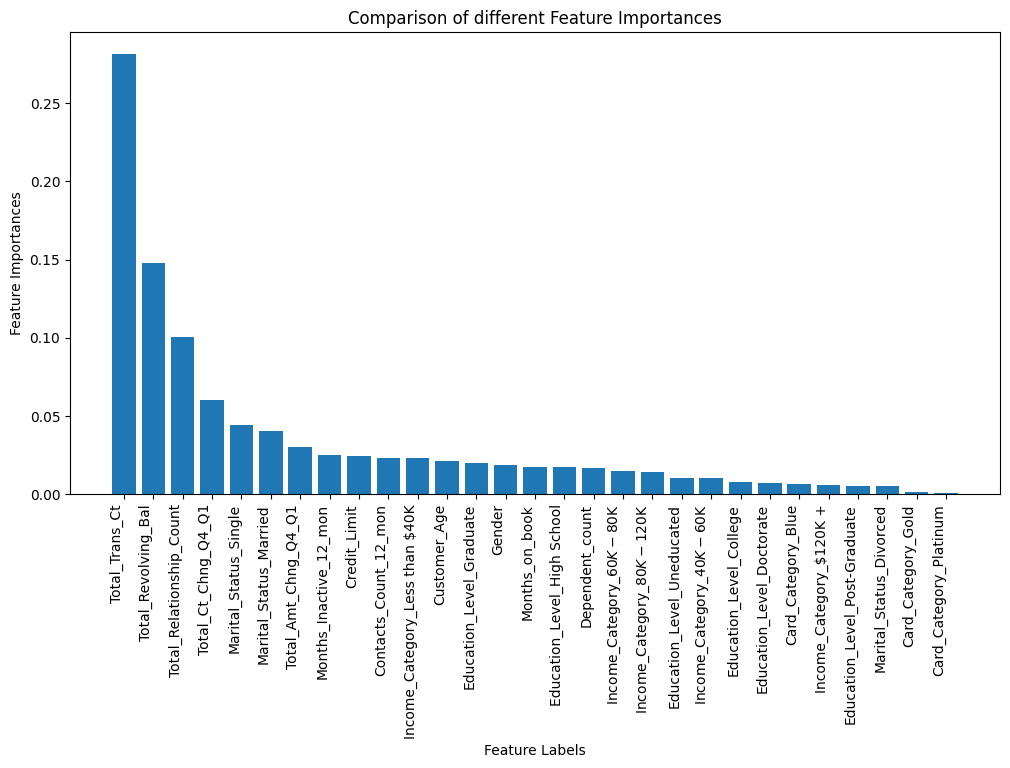

In [44]:
# Tạo mô hình Extra Trees với các tham số cụ thể
extra_tree_forest = ExtraTreesClassifier(n_estimators=32, criterion='entropy', max_features=20)

# Huấn luyện mô hình trên dữ liệu tăng cường và trộn ngẫu nhiên
extra_tree_forest.fit(x_over_train_shuffled, y_over_train_shuffled)

# Trích xuất mức độ quan trọng của các đặc trưng từ mô hình đã được huấn luyện
feature_importance = extra_tree_forest.feature_importances_

# Tạo DataFrame chứa thông tin về mức độ quan trọng của các đặc trưng
importance_df = pd.DataFrame({'feature': x_over_train_shuffled.columns, 'importance': feature_importance})

# Sắp xếp DataFrame theo mức độ quan trọng giảm dần
importance_df = importance_df.sort_values('importance', ascending=False)

# Vẽ đồ thị cột về mức độ quan trọng của các đặc trưng
plt.figure(figsize=(12, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()


In [45]:
# Chọn các cột cụ thể từ x_over_train_shuffled để tạo DataFrame mới
x_train_over_sample_df = x_over_train_shuffled[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon']]

In [46]:
# Chọn các cột cụ thể từ x_test để tạo DataFrame mới
x_test_over_sample_df = x_test[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon']]

In [47]:
def test_normality(df):
    normality_results = {}

    # Duyệt qua từng cột trong DataFrame
    for column_name in df.columns:
        reject_h0 = False

        # Lấy dữ liệu từ cột hiện tại
        data = df[column_name]

        # Thực hiện kiểm định Anderson-Darling
        nordistest = anderson(data)

        # So sánh statistic với các critical values
        for i in range(len(nordistest.critical_values)):
            sl, cv = nordistest.significance_level[i], nordistest.critical_values[i]
            if nordistest.statistic >= cv:
                reject_h0 = True
                break

        # Xác định kết luận về tính phân phối chuẩn
        if reject_h0:
            conclusion = f"Data is not normally distributed (reject H0)"
        else:
            conclusion = f"Data is normally distributed (fail to reject H0)"

        # Lưu kết quả vào dictionary
        normality_results[column_name] = conclusion

    # Trả về dictionary chứa kết quả kiểm tra cho từng cột
    return normality_results

In [48]:
# Kiểm tra tính phân phối chuẩn của các biến trong x_train_over_sample_df
normality_results = test_normality(x_train_over_sample_df)

# In ra kết quả kiểm tra cho từng biến
for column_name, result in normality_results.items():
    print(f"Normality: '{column_name}': {result}")

Normality: 'Total_Trans_Ct': Data is not normally distributed (reject H0)
Normality: 'Total_Revolving_Bal': Data is not normally distributed (reject H0)
Normality: 'Total_Relationship_Count': Data is not normally distributed (reject H0)
Normality: 'Total_Ct_Chng_Q4_Q1': Data is not normally distributed (reject H0)
Normality: 'Months_Inactive_12_mon': Data is not normally distributed (reject H0)


In [49]:
# Tạo một đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu huấn luyện
x_max_train_scaled = scaler.fit_transform(x_train_over_sample_df)

# Chuẩn hóa dữ liệu kiểm thử (sử dụng mean và std từ dữ liệu huấn luyện)
x_max_test_scaled = scaler.transform(x_test_over_sample_df)

In [50]:
# Định nghĩa các giá trị có thể của các siêu tham số
rfparameters = {
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40],
    'criterion': ['gini', 'entropy']
}

# Tạo một đối tượng RandomForestClassifier
rfclf = RandomForestClassifier()

# Tạo đối tượng RandomizedSearchCV để tìm kiếm siêu tham số tốt nhất
rand_rfclf = RandomizedSearchCV(rfclf, rfparameters, cv=5, verbose=True, n_jobs=2)

# Huấn luyện mô hình trên dữ liệu đã được chuẩn hóa
rand_rfclf.fit(x_max_train_scaled, y_over_train_shuffled)

# In ra siêu tham số tốt nhất
print(rand_rfclf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy'}


In [51]:
# Định nghĩa các giá trị có thể của các siêu tham số
adaparams = {
    'base_estimator__max_depth': [10, 40, 50],
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1],
}

# Tạo một đối tượng DecisionTreeClassifier làm bộ phân loại cơ bản cho AdaBoost
base_classifier = DecisionTreeClassifier()

# Tạo một đối tượng AdaBoostClassifier với bộ phân loại cơ bản là DecisionTreeClassifier
adaclf = AdaBoostClassifier(base_estimator=base_classifier)

# Tạo đối tượng RandomizedSearchCV để tìm kiếm siêu tham số tốt nhất
ada_boostclf = RandomizedSearchCV(adaclf, adaparams, cv=5, verbose=True, n_jobs=-1)

# Huấn luyện mô hình trên dữ liệu đã được chuẩn hóa
ada_boostclf.fit(x_max_train_scaled, y_over_train_shuffled)

# In ra siêu tham số tốt nhất
print(ada_boostclf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'n_estimators': 300, 'learning_rate': 0.1, 'base_estimator__max_depth': 10}


# **Thuật Toán RandomForestClassifier**







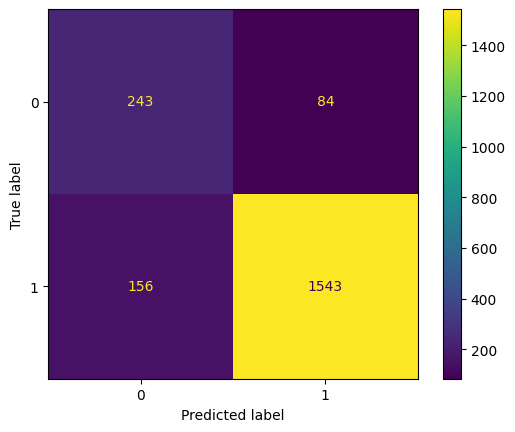

[[ 243   84]
 [ 156 1543]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       327
           1       0.95      0.91      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.78      0.83      0.80      2026
weighted avg       0.89      0.88      0.89      2026

Accuracy Score is 88.15399802566634


In [52]:
# Tạo một đối tượng RandomForestClassifier với siêu tham số đã chọn
rand_clf = RandomForestClassifier(max_features='sqrt', n_estimators=200, max_depth=20, criterion='entropy')

# Huấn luyện mô hình trên dữ liệu đã được chuẩn hóa
rand_clf.fit(x_max_train_scaled, y_over_train_shuffled)

# Dự đoán trên dữ liệu kiểm thử
rand_rc_pred = rand_clf.predict(x_max_test_scaled)

# Tạo Confusion Matrix và hiển thị nó
cm = confusion_matrix(y_test, rand_rc_pred, labels=rand_clf.classes_)
ConfusionMatrixDisplay.from_estimator(rand_clf, x_max_test_scaled, y_test)
plt.show()

# In ra Confusion Matrix
print(confusion_matrix(y_test, rand_rc_pred))

# In ra báo cáo phân loại
print(classification_report(y_test, rand_rc_pred))

# In ra độ chính xác
print("Accuracy Score is", (accuracy_score(y_test, rand_rc_pred) * 100))

# **Thuật toán AdaBoostClassifier**

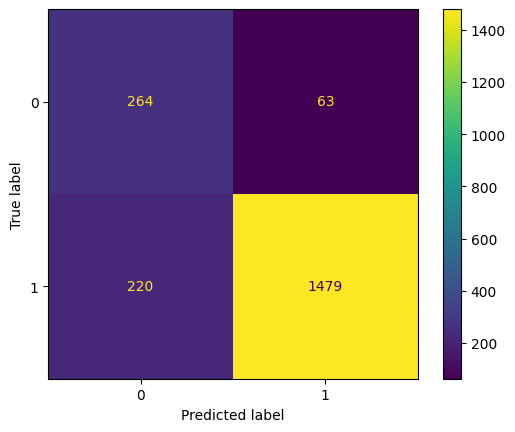

[[ 264   63]
 [ 220 1479]]
              precision    recall  f1-score   support

           0       0.55      0.81      0.65       327
           1       0.96      0.87      0.91      1699

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026

Accuracy Score is 86.03158933859822
Adaboost AUC = 0.84


In [53]:
# Tạo một đối tượng AdaBoostClassifier với siêu tham số đã chọn
adaboostmodel = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

# Huấn luyện mô hình trên dữ liệu đã được chuẩn hóa
adaboostmodel.fit(x_max_train_scaled, y_over_train_shuffled)

# Dự đoán trên dữ liệu kiểm thử
adaboost_pred = adaboostmodel.predict(x_max_test_scaled)

# Tạo Confusion Matrix và hiển thị nó
cm = confusion_matrix(y_test, adaboost_pred, labels=adaboostmodel.classes_)
ConfusionMatrixDisplay.from_estimator(adaboostmodel, x_max_test_scaled, y_test)
plt.show()

# In ra Confusion Matrix
print(confusion_matrix(y_test, adaboost_pred))

# In ra báo cáo phân loại
print(classification_report(y_test, adaboost_pred))

# In ra độ chính xác
print("Accuracy Score is", (accuracy_score(y_test, adaboost_pred) * 100))

# Tính và in ra điểm AUC cho AdaBoost
adaboost_roc_auc = roc_auc_score(y_test, adaboost_pred)
print("Adaboost AUC = %0.2f" % adaboost_roc_auc)

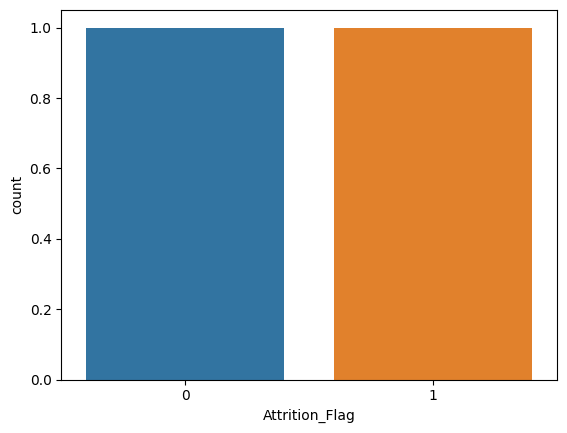

In [54]:
# Tạo một đối tượng RandomUnderSampler với random_state=42
undersample = RandomUnderSampler(random_state=42)

# Áp dụng Random Under-sampling cho dữ liệu huấn luyện
x_train_under_sample, y_train_under_sample = undersample.fit_resample(x_train, y_train)

# Đếm số lượng mẫu trước và sau khi Under-sampling
counter_before = Counter(y_train)
counter_after = Counter(y_train_under_sample)

# Tạo DataFrame để hiển thị số lượng mẫu trước và sau khi Under-sampling
df_after = pd.DataFrame(list(counter_after.items()), columns=["Attrition_Flag", 'Count'])

# Vẽ đồ thị dạng countplot để hiển thị số lượng mẫu trước và sau khi Under-sampling
sns.countplot(x='Attrition_Flag', data=df_after)
plt.show()

Biến mục tiêu

In [55]:
# Xác định các đặc trưng và biến mục tiêu
features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
            'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

target = 'Attrition_Flag'

# Tạo DataFrame mới chỉ chứa các đặc trưng và biến mục tiêu
data = df[features + [target]]

In [56]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Thuật toán Naive Bayes**

In [57]:
# Xây dựng mô hình Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra: accuracy và F1 score
accuracy = model.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Tính recall score
recall = recall_score(y_test, y_pred, pos_label=1)

# In kết quả
print(f'Naive Bayes Accuracy: {accuracy}')
print(f'Naive Bayes F1 Score: {f1}')
print(f'Naive Bayes Recall Score: {recall}')


Naive Bayes Accuracy: 0.8845014807502468
Naive Bayes F1 Score: 0.9319371727748692
Naive Bayes Recall Score: 0.9429075927015892


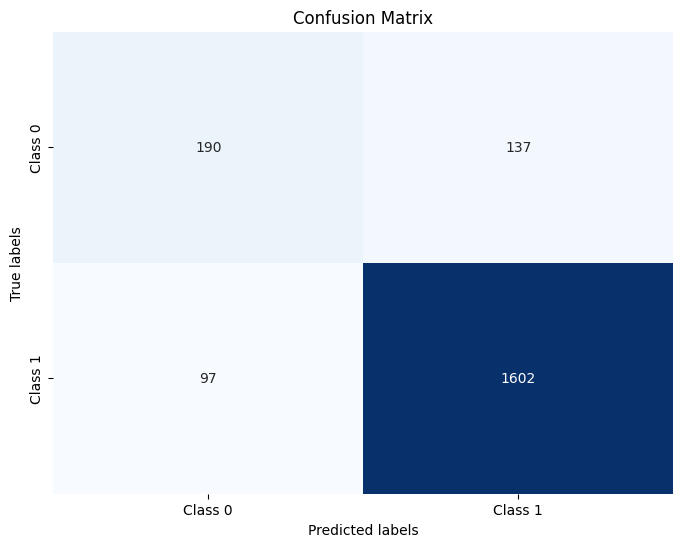

In [58]:
# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Thuật toán Decision Tree**

In [59]:
max_depth_values = range(1, 50)  # Bạn có thể điều chỉnh phạm vi này

# Khởi tạo biến để theo dõi độ sâu tối đa tốt nhất và điểm số tương ứng
best_max_depth = None
best_score = 0.0

# Lặp qua các giá trị max_depth khác nhau
for max_depth in max_depth_values:
    # Khởi tạo DecisionTreeClassifier với max_depth hiện tại
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=91)
    # Fit mô hình với dữ liệu huấn luyện
    clf.fit(X_train, y_train)
    # Đánh giá mô hình trên dữ liệu kiểm tra
    test_score = clf.score(X_test, y_test)
    # Thực hiện cross-validation trên dữ liệu huấn luyện
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # In ra điểm số cho max_depth hiện tại
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Kiểm tra nếu mô hình hiện tại có điểm số tốt hơn mô hình tốt nhất trước đó
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# In ra độ sâu tối đa tốt nhất và điểm số tương ứng
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 1: Test Score = 0.8385982230997039
Max Depth = 2: Test Score = 0.8894373149062191
Max Depth = 3: Test Score = 0.9180651530108588
Max Depth = 4: Test Score = 0.9249753208292202
Max Depth = 5: Test Score = 0.9353405725567621
Max Depth = 6: Test Score = 0.93928923988154
Max Depth = 7: Test Score = 0.93928923988154
Max Depth = 8: Test Score = 0.9378084896347483
Max Depth = 9: Test Score = 0.9427443237907206
Max Depth = 10: Test Score = 0.9323790720631787
Max Depth = 11: Test Score = 0.9353405725567621
Max Depth = 12: Test Score = 0.9313919052319842
Max Depth = 13: Test Score = 0.9313919052319842
Max Depth = 14: Test Score = 0.9338598223099703
Max Depth = 15: Test Score = 0.928923988153998
Max Depth = 16: Test Score = 0.9294175715695953
Max Depth = 17: Test Score = 0.930898321816387
Max Depth = 18: Test Score = 0.9304047384007897
Max Depth = 19: Test Score = 0.9304047384007897
Max Depth = 20: Test Score = 0.9304047384007897
Max Depth = 21: Test Score = 0.9304047384007897
Max Dep

In [60]:
# Xây dựng và huấn luyện mô hình Decision Tree với max_depth=3
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
accuracy = model.score(X_test, y_test)
predictions = model.predict(X_test)

# Tính F1 score
f1 = f1_score(y_test, predictions, pos_label=1)

# Tính recall score
recall = recall_score(y_test, predictions, pos_label=1)

# In kết quả
print(f'Decision Tree Accuracy: {accuracy}')
print(f'Decision Tree F1 Score: {f1}')
print(f'Decision Tree Recall Score: {recall}')

Decision Tree Accuracy: 0.9180651530108588
Decision Tree F1 Score: 0.9512051734273956
Decision Tree Recall Score: 0.9523248969982343


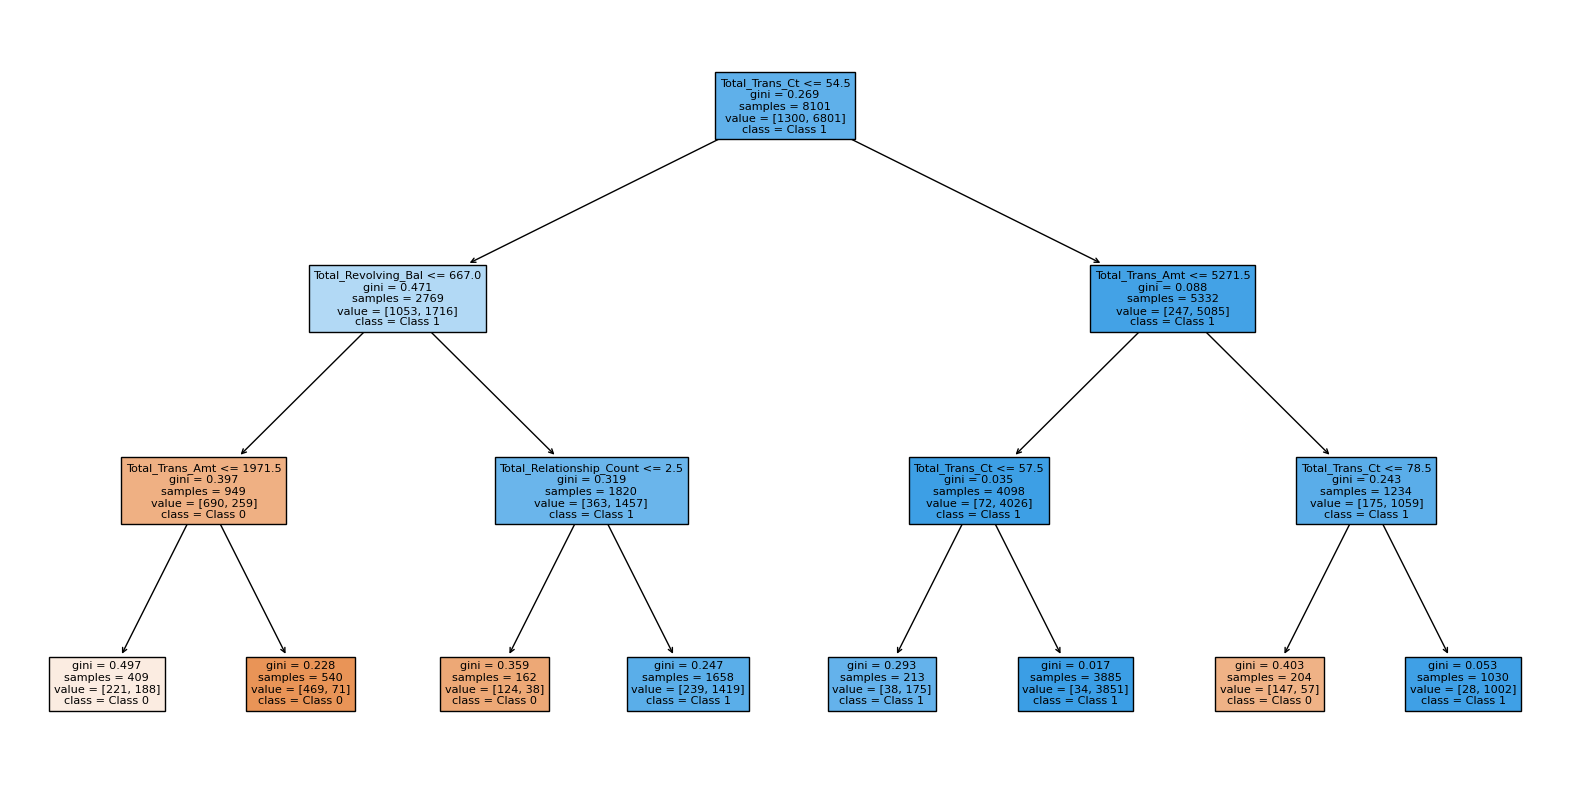

In [61]:
# Vẽ biểu đồ Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()